

---


**$$\color{orange}{AML\ 5251\,\lvert\, Advanced\ Applications\ of\ Probability\ and\ Statistics\,\lvert\,Lab\ Final\,\lvert\,Even\ Semester\ 2024}$$**

---

**Instructions:**
1. There are 15 questions;
2. The exam is open book, notes, internet etc. You are welcome to refer to any non-human resource such as ChatGPT, Grok, Bard etc., for answering the questions;
3. However, you must *not* discuss your questions or code with anyone else, inside or outside the class;
4. You should not share the code with anyone else; doing so will result in significant penalties for all involved.
5. By submitting your work, you are implicitly honoring the agreement above;
6. You might be called for a one-on-one during the exam after reviewing your submission to explain your code and answer additional questions. Failure to justify your code and answers will result in significant points docked from your exam score.
7. After finishing the exam, delete all codes related to the exam from the computer you are working on.

---

**Upload the following two files by clicking [here](https://learnermanipal-my.sharepoint.com/:f:/g/personal/sudarsan_acharya_manipal_edu/Eto_Pwl2emZJj4IbamCelXsBwWHW3cap4dyk6KT6868yfw)**

1. completed code clearly showing the output cells (.ipynb file) **with the naming convention example** $$\color{cyan}{\text{AAPS_LabFinal_SudarsanAcharya.ipynb}}$$ and
2. PDF of your completed code clearly showing the output cells (go to file->print->save as PDF choosing Landscape orientation) **with the naming convention example** $$\color{cyan}{\text{AAPS_LabFinal_SudarsanAcharya.pdf}}$$


---

In [1]:
# Install and load packages
library(ggplot2)
library(dplyr)
install.packages('HSAUR')
library(HSAUR)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tools



In [2]:
# Load the heptathlon dataset
data(heptathlon)
str(heptathlon)

'data.frame':	25 obs. of  8 variables:
 $ hurdles : num  12.7 12.8 13.2 13.6 13.5 ...
 $ highjump: num  1.86 1.8 1.83 1.8 1.74 1.83 1.8 1.8 1.83 1.77 ...
 $ shot    : num  15.8 16.2 14.2 15.2 14.8 ...
 $ run200m : num  22.6 23.6 23.1 23.9 23.9 ...
 $ longjump: num  7.27 6.71 6.68 6.25 6.32 6.33 6.37 6.47 6.11 6.28 ...
 $ javelin : num  45.7 42.6 44.5 42.8 47.5 ...
 $ run800m : num  129 126 124 132 128 ...
 $ score   : int  7291 6897 6858 6540 6540 6411 6351 6297 6252 6252 ...


In [3]:
# Introduce a new column called sprint highlighting slow and fast sprinters
heptathlon = heptathlon %>% mutate(sprint = ifelse(run200m <= 25 & run800m <= 129, 'fast', 'slow'))

# Change sprint column to factor type
heptathlon['sprint'] = lapply(heptathlon['sprint'], factor)

In [4]:
# Print the first few rows of the dataframe
head(heptathlon)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score,sprint
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291,fast
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897,fast
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858,fast
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540,slow
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540,fast
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411,fast


**Question-1**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis). What do you observe from this plot?

Athletes who take longer time to complete to complete 200m race, also cannot jump longer, so these people are physically weak or we can say they are average in sports

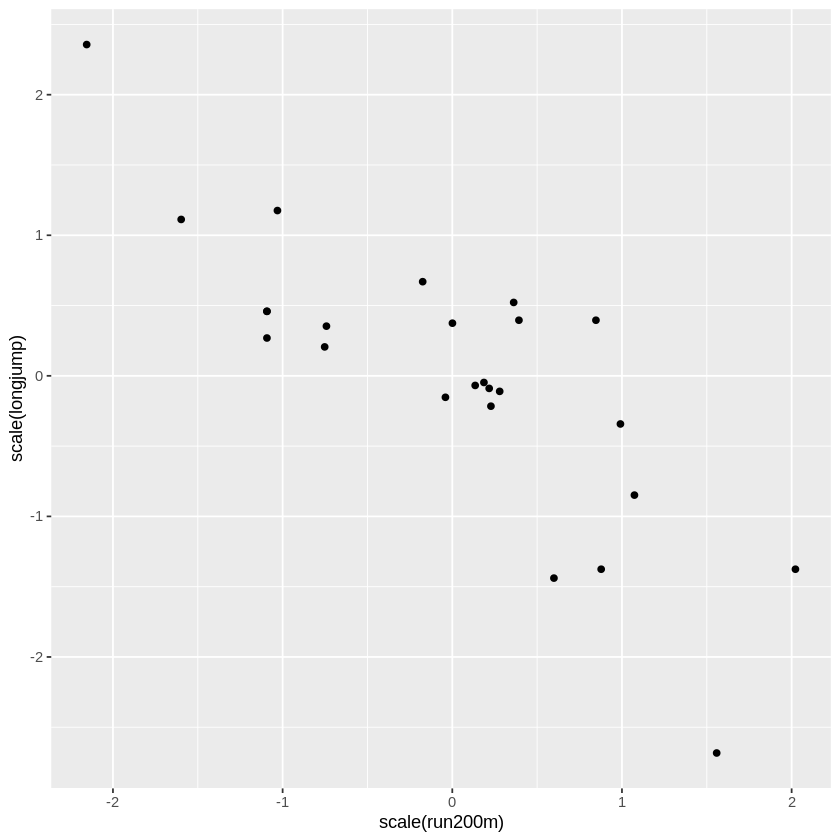

In [66]:
p1 = ggplot(data = heptathlon, aes(x = scale(run200m), y = scale(longjump))) +
  geom_point()

p1

Athletes who take longer time to complete to complete 200m race, also cannot jump longer, so these people are physically weak or we can say they are average in sports


**Question-2**: Make a scatter plot between *run200m* (x-axis) and *longjump* (y-axis) with the data points color-coded using *sprint*. What do you observe from this plot?

As observed before, slow sprinters don't jump as long as fast sprinters

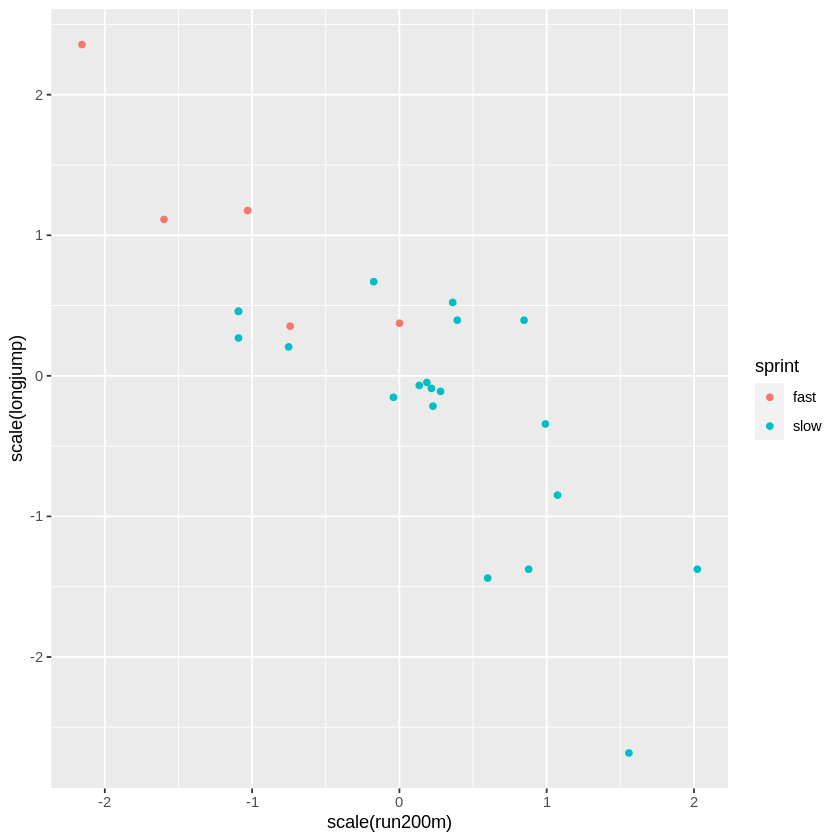

In [67]:
p2 = ggplot(data = heptathlon, aes(x = scale(run200m), y = scale(longjump), colour = sprint)) +
  geom_point()

p2


As observed before, slow sprinters don't jump as long as fast sprinters

**Question-3**: Calculate Pearson's correlation between *run200m* and *longjump*. What do you observe?

As previously observed, there was relationship between two features and hence their pearson correlation coefficient value is higher supporting the observation

In [13]:
cor(heptathlon$run200m, heptathlon$longjump, method = 'pearson')

[1] -0.8172053

As previously observed, there was relationship between two features and hence their pearson correlation coefficient value is higher supporting the observation

**Question-4**: Select data frame without *sprint* and *score* columns.

In [18]:
hData = heptathlon %>% select(-c('sprint','score'))

**Question 5**: Using the code in the cell below, answer the following questions:

1. Which principal component assigns the greatest weight (in magnitude) to *run200m*?

principal component 4

2. Which principal component assigns the greatest weight (in magnitude) to *longjump*?

principal component 6

3. *True/false*: the 2nd principal component score for a sample assigns a maximum weight to *javelin*.

True

4. The 1st principal component assigns the least weight (in magnitude) to which feature?

 high jump

Does using the correlation matrix change your answers to the above questions? Which one will you finally use for dimension reduction using PCA: the covariance or the correlation matrix?


yes using correlation matrix, answers to above change as correlation is equivalent to doing covariance on standardized features. Since there is difference in units, we should use correlation matrix to perform dimension reduction using PCA

In [19]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cov(hData))

# Eigenvectors of the sample covariance matrix
u =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

In [69]:
lambda

[1] 4.46027516 1.19432056 0.52101413 0.45716683 0.24526674 0.07295558 0.04900101

In [22]:
u

0.069508692,0.0094891417,0.22180829,0.32737674,0.80702932,0.424850883,0.083123145
-0.005569781,-0.0005647147,-0.01451405,-0.02123856,-0.14013823,0.098373568,0.984881131
-0.077906090,-0.1359282330,-0.88374045,0.42500654,0.10442207,-0.051744802,0.015649644
0.072967545,0.1012004268,0.31005700,0.81585220,-0.46178680,0.082486244,-0.051312974
-0.040369299,-0.0148845034,-0.18494319,-0.20419828,-0.31899315,0.894592570,-0.142110352
0.006685584,-0.9852954510,0.16021268,0.03216907,-0.04880388,0.006170438,-0.005033005
0.990994208,-0.0127652701,-0.11655815,-0.05827720,-0.02784756,-0.002987043,-0.001041451


In [24]:
head(hData)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51
John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12
Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20
Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24
Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90
Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79


In [25]:
# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(cor(hData))

# Eigenvectors of the sample covariance matrix
u =e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

In [26]:
u

0.4528710,-0.15792058,0.04514996,-0.02653873,-0.09494792,0.78334101,0.38024707
-0.3771992,0.24807386,-0.36777902,0.67999172,-0.01879888,0.09939981,0.43393114
-0.3630725,-0.28940743,0.67618919,0.12431725,-0.51165201,-0.05085983,0.21762491
0.4078950,0.26038545,-0.08359211,0.36106580,-0.64983404,-0.02495639,-0.45338483
-0.4562318,0.05587394,0.13931653,0.11129249,0.18429810,0.59020972,-0.61206388
-0.0754090,-0.84169212,-0.47156016,0.12079924,-0.13510669,-0.02724076,-0.17294667
0.3749594,-0.22448984,0.39585671,0.60341130,0.50432116,-0.15555520,-0.09830963


**Question-6**: Explain the output of the cell below?

In [27]:
# Extract data matrix from data frame
X = as.matrix(hData)

print(X %*% u[, 1])

                        [,1]
Joyner-Kersee (USA) 49.93696
John (GDR)          49.91364
Behmer (GDR)        49.71798
Sablovskaite (URS)  53.21905
Choubenkova (URS)   51.35895
Schulz (GDR)        51.73902
Fleming (AUS)       54.07977
Greiner (USA)       54.60846
Lajbnerova (CZE)    55.48134
Bouraga (URS)       55.08458
Wijnsma (HOL)       54.56734
Dimitrova (BUL)     54.01637
Scheider (SWI)      55.76178
Braun (FRG)         58.24602
Ruotsalainen (FIN)  56.32283
Yuping (CHN)        59.80964
Hagger (GB)         57.51637
Brown (USA)         59.96723
Mulliner (GB)       57.55422
Hautenauve (BEL)    56.63261
Kytola (FIN)        56.45869
Geremias (BRA)      60.00204
Hui-Ing (TAI)       58.78673
Jeong-Mi (KOR)      59.57048
Launa (PNG)         68.81961


This is PC1 score - when samples are projected along the 1st principal component direction

**Question-7**: Explain the output of the cell below?

In [28]:
print(var(X %*% u[, 2]))

         [,1]
[1,] 13.23981


This is the variance (or amount of information) captured by the 2nd PC for the hurdles feature

**Question-8**: How many minimum principal components are needed to explain more than 90% of the variance in the data? In one line, explain how you could use the corresponding principal component scores (projected values) to get a final score for each athlete so that they can be ranked.

In [43]:
cumulative_variance = cumsum(lambda) / sum(lambda)
num_PCs_90_percent = which.max(cumulative_variance >= 0.90)
num_PCs_90_percent

[1] 4

4 PCs minimum are required to explain more than 90% variance in the data

In [47]:
X %*% u[, 1:7]

Joyner-Kersee (USA),49.93696,-67.11558,39.03978,94.90704,35.99698,-8.184508,-26.13766
John (GDR),49.91364,-63.88187,39.70643,93.43006,34.16488,-7.988503,-25.38962
Behmer (GDR),49.71798,-64.72263,36.68660,92.06751,34.28581,-7.367358,-25.57125
Sablovskaite (URS),53.21905,-65.22693,41.29680,97.05132,37.40086,-8.578530,-25.79882
Choubenkova (URS),51.35895,-68.04832,37.08054,94.91268,34.83731,-8.050236,-26.39527
Schulz (GDR),51.73902,-63.13208,37.50027,93.23824,34.55425,-7.346653,-25.86182
Fleming (AUS),54.07977,-62.55284,41.03933,96.53851,39.35070,-8.538682,-25.91865
Greiner (USA),54.60846,-61.03425,43.34634,97.41623,39.00292,-8.542836,-25.76151
Lajbnerova (CZE),55.48134,-65.07790,42.32793,99.50584,39.24765,-9.194518,-26.59969
Bouraga (URS),55.08458,-61.93655,42.30234,97.65935,40.75439,-8.992381,-25.98789
Wijnsma (HOL),54.56734,-59.98813,41.72285,96.17633,38.10406,-8.073881,-25.83639


In [48]:
Final_score = rowSums(X %*% u[, 1:7])
Final_score

Joyner-Kersee (USA)          John (GDR)        Behmer (GDR)  Sablovskaite (URS) 
           118.4430            119.9550            115.0967            129.3637 
  Choubenkova (URS)        Schulz (GDR)       Fleming (AUS)       Greiner (USA) 
           115.6956            120.6912            133.9981            139.0354 
   Lajbnerova (CZE)       Bouraga (URS)       Wijnsma (HOL)     Dimitrova (BUL) 
           135.6907            138.8838            136.6722            133.8046 
     Scheider (SWI)         Braun (FRG)  Ruotsalainen (FIN)        Yuping (CHN) 
           126.4797            141.7002            132.5419            156.7596 
        Hagger (GB)         Brown (USA)       Mulliner (GB)    Hautenauve (BEL) 
           149.3682            147.7208            146.8377            144.0056 
       Kytola (FIN)      Geremias (BRA)       Hui-Ing (TAI)      Jeong-Mi (KOR) 
           137.5286            151.8372            144.6951            146.2850 
        Launa (PNG) 
           171.1923

use the principal component scores and add them up across rows to get a final score for each athlete, which can be used for ranking






**Question 9**: how many levels does the categorical variable *sprint* have? What is the reference level?

2 levels and fast is the reference level

In [50]:
levels(heptathlon$sprint)

[1] "fast" "slow"

2 levels and fast is the reference level

**Question 10**: fit a linear model for approximating *score* as a function of *shot* and *sprint*. Print the model's summary. How accurate is the model?

The model is approx 64% accurate

In [51]:
model = lm(data = heptathlon, score ~ shot + sprint)
summary(model)


Call:
lm(formula = score ~ shot + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1124.58  -164.40    35.93   207.34   496.35 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3080.0      883.0   3.488 0.002084 ** 
shot           249.7       58.4   4.275 0.000308 ***
sprintslow    -330.4      213.4  -1.548 0.135842    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 338.5 on 22 degrees of freedom
Multiple R-squared:  0.6749,	Adjusted R-squared:  0.6454 
F-statistic: 22.84 on 2 and 22 DF,  p-value: 4.282e-06


The model is approx 64% accurate

**Question 11**: fit a linear model for approximating *score* as a function of *shot*, *javelin*, and *sprint*. Print the model's summary and answer the following questions:

1. Did the addition of the new predictor *javelin* improve the model accuracy?


No, in fact the accuracy was reduced (overfitting)

2. *True/false* (explain in one line): the model suggests that there is a possible linear relationship between an athlete's score and javelin performance.

False, javelin is insignificant feature as it's p-value is higher than threshold (assuming threshold is 5%)


3. For a 1 metre increase in shot put throw and with the same javelin and sprint performance, we can say with 95% confidence that the athlete's score will increase/decrease by an amount in the interval [130.2 , 368.8].



In [52]:
model = lm(data = heptathlon, score ~ shot + javelin + sprint)
summary(model)


Call:
lm(formula = score ~ shot + javelin + sprint, data = heptathlon)

Residuals:
     Min       1Q   Median       3Q      Max 
-1090.63  -173.25    12.63   203.29   537.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3349.127   1347.536   2.485  0.02144 *  
shot         249.548     59.669   4.182  0.00042 ***
javelin       -5.996     22.297  -0.269  0.79061    
sprintslow  -354.060    235.151  -1.506  0.14705    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 345.9 on 21 degrees of freedom
Multiple R-squared:  0.676,	Adjusted R-squared:  0.6298 
F-statistic: 14.61 on 3 and 21 DF,  p-value: 2.301e-05


**Question 12**: fit a linear model for approximating *score* as a function of *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?

The model is 81% accurate

2. Considering a p-value of 10% as cutoff, are there any insignificant features?

NO, all features are significant

In [53]:
model = lm(data = heptathlon, score ~ highjump + sprint)
summary(model)


Call:
lm(formula = score ~ highjump + sprint, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-476.12 -162.88  -29.12  146.92  502.33 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2030.8     1175.5  -1.728   0.0981 .  
highjump      4873.2      646.0   7.544 1.54e-07 ***
sprintslow    -703.3      123.3  -5.702 9.81e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 241.9 on 22 degrees of freedom
Multiple R-squared:  0.8341,	Adjusted R-squared:  0.819 
F-statistic: 55.29 on 2 and 22 DF,  p-value: 2.625e-09


**Question 13**: Using the model built above, extract the slope and intercept for estimating the *score* of *slow* and *fast* athletes. It would be helpful to start with the regression equation $\hat{y}^{(i)} = \hat{\beta}_0 + \hat{\beta}_1x_1^{(i)} + \hat{\beta}_2x_2^{(i)},$ and then write two separate equations for *slow* and *fast* athletes.

In [60]:
estimates = coef(model)
estimates

(Intercept)    highjump  sprintslow 
 -2030.8279   4873.1942   -703.2552

In [ ]:
intercept_slow = estimates[1] + estimates[2]*highjump + estimates[3]
intercept_fast = estimates[1] + estimates[2]*highjump

slope_slow = estimates[1]
slope_fast = estimates[3]

**Question 14**: fit a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint*. Print the model's summary and answer the following questions:
1. How accurate is this model?

89%

2. Considering a p-value of 10% as cutoff, are there any insignificant features?

no, all features significant

In [63]:
model = lm(data = heptathlon, score ~ highjump + sprint + shot)
summary(model)


Call:
lm(formula = score ~ highjump + sprint + shot, data = heptathlon)

Residuals:
    Min      1Q  Median      3Q     Max 
-386.03 -103.72  -37.17  126.92  363.95 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2508.72     898.90  -2.791  0.01095 *  
highjump     3950.55     537.93   7.344 3.16e-07 ***
sprintslow   -416.72     116.22  -3.586  0.00174 ** 
shot          144.30      34.74   4.153  0.00045 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 183.4 on 21 degrees of freedom
Multiple R-squared:  0.9089,	Adjusted R-squared:  0.8959 
F-statistic: 69.84 on 3 and 21 DF,  p-value: 4.306e-11


**Question 15**: Complete the code below to build a linear model for approximating *score* as a function of *shot*, *highjump*, and *sprint* using the training data. Predict the model performance by applying it to the test data.

In [65]:
# Split the data into 80% train and 20% test parts
set.seed(0)
train_ind = sample(seq_len(nrow(hData)), size = floor(0.8 * nrow(hData)))

hDataTrain = heptathlon[train_ind, ]
hDataTest = heptathlon[-train_ind, ]

# Build linear regression model
model = lm(data = hDataTrain, score ~ shot + highjump + sprint)

# Predict on the test data
predict(model, hDataTest)

# Print the true scores for the test data
print(hDataTest$score)

Behmer (GDR)  Greiner (USA) Scheider (SWI)   Kytola (FIN) Jeong-Mi (KOR) 
      6753.120       6215.849       6101.006       5761.886       5415.185

[1] 6858 6297 6137 5686 5289


In [81]:
rmse = sqrt(mean((predict(model, hDataTest) - hDataTest$score)^2))
rmse

[1] 90.06889